### Data Exploration and targer variable part-1

In [1]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/Transformed_Housing_Data2.csv")

In [ ]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

In [ ]:
data['Sale_Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1129575.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale_Price, dtype: float64

In [ ]:
data['Sale_Price'].tail(10)


21599     507250.0
21600     429000.0
21601     610685.0
21602    1010000.0
21603     475000.0
21604     360000.0
21605     400000.0
21606     402101.0
21607     400000.0
21608     325000.0
Name: Sale_Price, dtype: float64

In [ ]:
data['Sale_Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale_Price, dtype: float64

### Data Exploration- Target variable part-2

**An outier is a data point that is distinct from other data points.Its value lies outside the usual range of rest of the values in the data and hence the term 'outlier'**

Any data point which is higher than the upper limit or lower than the lower limit can be termed as an outlier

In [ ]:
import matplotlib.pyplot as plt


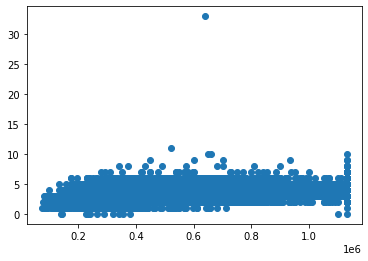

In [ ]:
plt.scatter(x=data['Sale_Price'],y=data['No of Bedrooms'])

In [ ]:
import seaborn as sns
# can ignore missing values

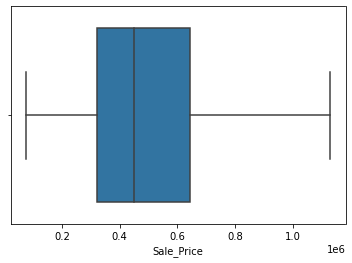

In [ ]:
sns.boxplot(x=data['Sale_Price'])

### Data Exploration and targer variable part-3

Different ways of treating outlier:

1) Deletion

2) Capping or Imputation

3) Data Transformation

4) Binning

1--> Deletion:
The entire row containing outliers is removed.

>Data size is reduced.

>If dataset is small then valuable information in the process is lost, hence not advisiable to do it.

2-->Impuation:Outlier are not removed but replaced with average/mean/median/mode value

3--> Data Transformation: The variable is transformed to its log value or the square or cube root.

4-->Binning: Different bins are formed based on the values of the variable to treat the outliers.


In [ ]:
q1 = data["Sale_Price"].quantile(0.25)
q3 = data["Sale_Price"].quantile(0.75)

In [ ]:
iqr = q3-q1

In [ ]:
iqr

323050.0

In [ ]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [ ]:
def limit_imputer(value):
  if value<lower_limit:
    return lower_limit
  if value>upper_limit:
    return upper_limit
  else:
    return value

In [ ]:
data['Sale_Price'] = data['Sale_Price'].apply(limit_imputer)

In [ ]:
data['Sale_Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale_Price, dtype: float64

Still mean is greater than mode(50%) therefore anamolies still exist.

The data is not normally distributed and a bit skewed towards lower value.

### Data Exploration and target variable part 4

Treating missing values.

* Deletion
* Imputation

>Entire row containing missing value is reduced.We can loose some important informaion , hence not advisable.

>A missing value row is not removed but the missing value in it replaced with the mean/average/mode/median value.
But it is not advisable to do imputation for target value.(Deletion is prefered)

In [ ]:
data.dropna(inplace=True,axis=0,subset=['Sale_Price'])

In [ ]:
data
# But in our dataset we don't have any not null value

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,9,47.6993,-122.346,1530.0,1509,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,4,47.5107,-122.362,1830.0,7200,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,9,47.5944,-122.299,1020.0,2007,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,14,47.5345,-122.069,1410.0,1287,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


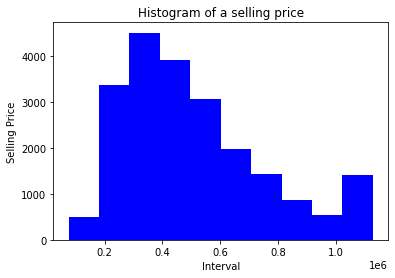

In [ ]:
# Plot a histogram
plt.hist(data["Sale_Price"],bins=10,color="blue")
plt.xlabel("Interval")
plt.ylabel("Selling Price")
plt.title("Histogram of a selling price")
plt.show()

Data is skewed towards lower value

### Data exploration- Independent numerical variable part-1

In [ ]:
numerical_columns = ['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)']

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

fit--> The function calculate the median value with respect to every column that we have passed in as a parameter and store it

Transform-->The function does the actual action of locating the missing values and imputing them using the median strategy.

## Data Exploration
### Solving Regression Model containing oulier and anamolies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model= pd.read_csv('/content/1. Regression - Module - (Housing Prices).csv')

In [ ]:
model

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [ ]:
model['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

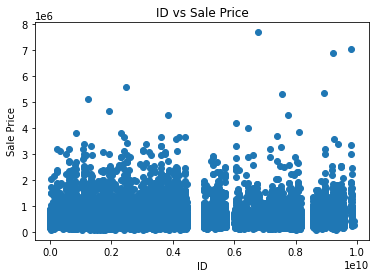

In [ ]:
plt.scatter(x=model['ID'],y=model['Sale Price'])
plt.xlabel('ID')
plt.ylabel('Sale Price')
plt.title("ID vs Sale Price")
plt.show()

(array([1.9017e+04, 2.1420e+03, 3.2200e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

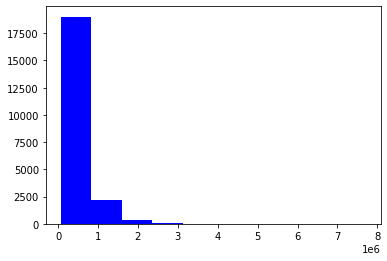

In [ ]:
plt.hist(model['Sale Price'],bins=10,color='Blue')

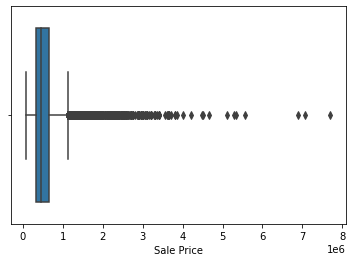

In [ ]:
sns.boxplot(x=model['Sale Price'])

Hence their are some outliers.

Lets first remove outlier of target variable.
Here **Sale Price**

In [ ]:
q1 = model['Sale Price'].quantile(0.25)
q3 = model['Sale Price'].quantile(0.75)

In [ ]:
iqr = q3-q1
iqr

323050.0

In [ ]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [ ]:
def limit_imputer(value):
  if value<lower_limit:
    return lower_limit
  if value>upper_limit:
    return upper_limit
  else:
    return value

In [ ]:
model['Sale Price']=model['Sale Price'].apply(limit_imputer)

In [ ]:
model['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

### Handle Missing Values

In [ ]:
model.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [ ]:
model

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


(array([ 501., 3379., 4513., 3911., 3069., 1977., 1432.,  877.,  531.,
        1419.]),
 array([  75000. ,  180457.5,  285915. ,  391372.5,  496830. ,  602287.5,
         707745. ,  813202.5,  918660. , 1024117.5, 1129575. ]),
 <a list of 10 Patch objects>)

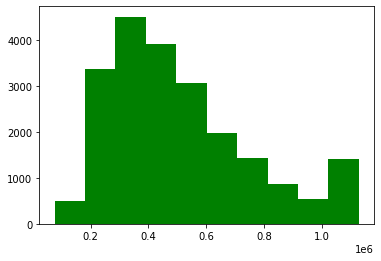

In [ ]:
plt.hist(model['Sale Price'],bins=10,color="Green")

In [ ]:
len(model['Latitude'].unique())

5034

In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
numerical_columns = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)'
,'Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='median')
model[numerical_columns]=imputer.fit_transform(model[numerical_columns])

In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
model['Zipcode'].shape

(21609,)

In [ ]:
column = model['Zipcode'].values.reshape(-1,1) # (row,column)
column.shape

(21609, 1)

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
model['Zipcode']=imputer.fit_transform(column)

In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
def copy_csv(filename):
  df=pd.read_csv('1. Regression - Module - (Housing Prices).csv')
  df.to_csv('Housing Prices2.csv')
# copy_csv('1. Regression - Module - (Housing Prices).csv')

### Data exploration -- Independent Variable part 2

Explain and perform variable transformation

In [ ]:
 model.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503


In [ ]:
model['Zipcode']=model['Zipcode'].astype('object')

In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        0 non-null      object 
 10  Condition of the House

In [ ]:
model['No of Times Visited'].unique()

array([nan], dtype=object)

In [ ]:
mapping = {'None':"0",
           'Once':"1",
           'Twice':"2",
           'Thrice':"3",
           'Four':"4"}

In [ ]:
model['No of Times Visited']=model['No of Times Visited'].map(mapping)

In [ ]:
model['No of Times Visited'].unique()


array([nan], dtype=object)

In [ ]:
model['Ever Renovate']=np.where(model['Renovated Year']==0,'No','Yes')

In [ ]:
model.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503,No


In [ ]:
model['Purchase Year']=pd.DatetimeIndex(model['Date House was Sold']).year

In [ ]:
model['Year since Renovation']=np.where(model['Ever Renovate']=='Yes',
                                       abs(model['Purchase Year']-model['Renovated Year']),0)

In [ ]:
model.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Purchase Year,Year since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503,No,2016,0


In [ ]:
model.drop(columns=['Purchase Year','Date House was Sold','Renovated Year'],inplace=True)

In [ ]:
model.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Year since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0


In [ ]:
model.to_csv('Transforming Data',index=False)

### Correlation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  defining data and finding corellation
data = pd.read_csv('/content/Transformed_Housing_Data.csv')
data.head() 

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [ ]:
data['Sale Price'].corr(data['No of Bedrooms'])

0.3394070872359204

In [ ]:
# Using numpy
np.corrcoef(data['Sale Price'],data['No of Bedrooms'])

array([[1.        , 0.33940709],
       [0.33940709, 1.        ]])

In [ ]:
data.drop(columns=['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.084830,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158


### Data Exploration- Categorical Variables

In [ ]:
data.drop(columns='ID',inplace=True)

In [ ]:
data['Condition of the House'].head(12)

0          Fair
1          Fair
2          Fair
3     Excellent
4          Fair
5          Fair
6          Fair
7          Fair
8          Fair
9          Fair
10         Fair
11         Good
Name: Condition of the House, dtype: object

In [ ]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

Finding Relationship with Dependent Variable(of categorical variable)

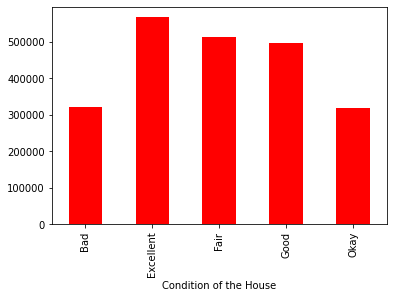

In [ ]:
data.groupby('Condition of the House',)['Sale Price'].mean().plot(kind='bar',color="red")

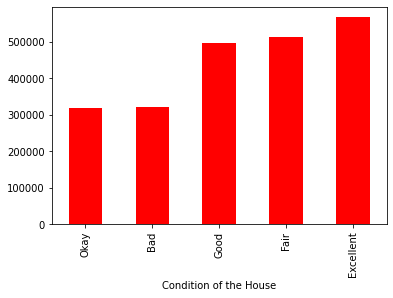

In [ ]:
data.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind='bar',color="red")

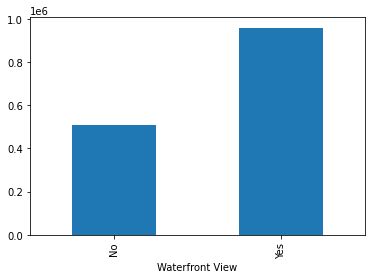

In [ ]:
data.groupby('Waterfront View',)['Sale Price'].mean().sort_values().plot(kind='bar')

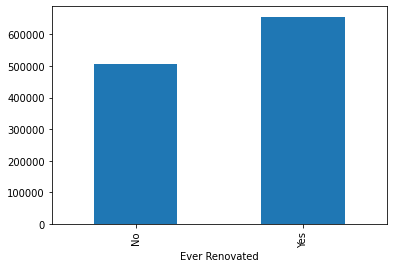

In [ ]:
data.groupby('Ever Renovated',)['Sale Price'].mean().sort_values().plot(kind='bar')

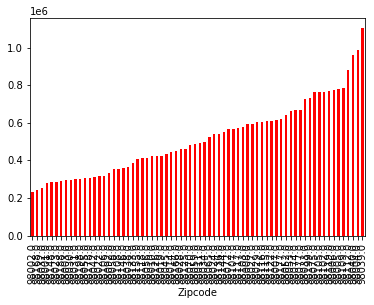

In [ ]:
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind='bar',color="red")

## Anova
(refer docs)

It is of 2 kinds.
* one way
* Two way


In [ ]:
# Import libraries
from statsmodels.formula.api import ols 
import statsmodels.api as sm

In [ ]:
data = data.rename(columns={'Sale Price':'Sale_price'})

In [ ]:
data.head()

,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [ ]:
data = data.rename(columns={'Condition of the House':'Condition_of_the_House'})

In [ ]:
data = data.rename(columns={'Ever Renovated':'Ever_Renovated'})

In [ ]:
data = data.rename(columns={'Waterfront View':'Waterfront_view'})


In [ ]:
data.head()

,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [ ]:
data['Waterfront_view'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
mod = ols('Sale_price ~ Condition_of_the_House',data=data).fit()

In [ ]:
Anova_Table = sm.stats.anova_lm(mod,typ=2) 

In [ ]:
print(Anova_Table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


Hence we reject Null Hypothesis(There is no difference in means) and accept Alternate Hypothesis(Means are different and the categorical variables does have an impact on target variable)

In [ ]:
mod = ols('Sale_price ~ Waterfront_view',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_view,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [ ]:
mod = ols('Sale_price ~ Ever_Renovated',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [ ]:
mod = ols('Sale_price ~ Zipcode',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


### Binning and Creating of Dummy Variables

If a categorical variables has **n** levels,then **n-1** dummy variables are required.

**Why dummie variable creation.**

>Regression modelling requires all the independent variables to be numerical variables.

>By creating dummy variables, we transform a categorical variable into a numerical variable.

* After it's creation we drop the categorical variable.
*'get_dummies' function is used

In [ ]:
 data.head(5)

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [ ]:
data = pd.get_dummies(data,columns = ['Condition of the House'],drop_first=True)

In [ ]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [ ]:
data = pd.get_dummies(data,columns = ['Waterfront View','Ever Renovated'],drop_first=True)

In [ ]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Waterfront View_Yes,Ever Renovated_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,26,0,1,0,0,0,1
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0


**Before moving , first we need to bin the data.**

If the number of levels for a categorical variabl is more , then bin these levels into fewer groups before creating the dummy variables.

In [ ]:
zip_table = data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending=True)


In [ ]:
zip_table.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [ ]:
zip_table['Zipcode_Group'] = pd.cut(zip_table['Sale Price'],bins=10,
                   labels=['Zipcode_Group_0',
                           'Zipcode_Group_1',
                           'Zipcode_Group_2',
                           'Zipcode_Group_3',
                           'Zipcode_Group_4',
                           'Zipcode_Group_5',
                           'Zipcode_Group_6',
                           'Zipcode_Group_7',
                           'Zipcode_Group_8',
                           'Zipcode_Group_9',
                           ],include_lowest=True)

In [ ]:
# We will perform left join here

data = pd.merge(data,zip_table,left_on='Zipcode',how='left',right_index=True)

In [ ]:
data = data.drop(columns='Zipcode',)

In [ ]:
data = data.drop(columns=['Sale Price_y','Ever Renovated_Yes','Waterfront View_Yes'])

In [ ]:
data.head()

,ID,Sale Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,Zipcode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,Zipcode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,Zipcode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,Zipcode_Group_4


In [ ]:
data.to_csv('Transformed_House_Data1.csv',index=False)

## Splitting of data into Train and Test Datasets

1) First step

Seprate the data into **Dependent variable(Y)** and **independent variable(X)**

In [2]:
data = pd.read_csv('/content/Transformed_Housing_Data2.csv')

In [9]:
data.head(5)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
# In "iloc" function last index is not considered
Y = data.iloc[:,0]
X=data.iloc[:,1:31]

In [14]:
X.head(5)


,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


### Splitting of data into train and test

In [15]:
 from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [19]:
X_train.shape


(15126, 30)

In [20]:
X_test.shape

(6483, 30)

In [21]:
Y_train.shape


(15126,)

In [22]:
Y_test.shape

(6483,)

### Feature Scaling

In [23]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [24]:
X_train = scale.fit_transform(X_train)

In [25]:
X_train

array([[ 0.66444723,  0.17304613,  0.17286677, ..., -0.11278716,
        -0.1698223 , -0.05084296],
       [-0.40315728, -1.45941973, -1.29150777, ..., -0.11278716,
        -0.1698223 , -0.05084296],
       [-1.47076178,  0.17304613, -0.87311504, ..., -0.11278716,
        -0.1698223 , -0.05084296],
       ...,
       [ 0.66444723,  3.43797786,  3.46495689, ..., -0.11278716,
        -0.1698223 , -0.05084296],
       [-0.40315728, -0.47994022, -0.41068098, ..., -0.11278716,
        -0.1698223 , -0.05084296],
       [ 0.66444723,  0.4995393 ,  0.27195978, ..., -0.11278716,
        -0.1698223 , -0.05084296]])

In [26]:
X_test = scale.fit_transform(X_test)

In [27]:
X_test

array([[-1.48277476, -0.45916079, -0.76756015, ..., -0.11106773,
        -0.16656095, -0.04122656],
       [-0.38829352, -0.77961933, -0.41702039, ..., -0.11106773,
        -0.16656095, -0.04122656],
       [ 0.70618773,  0.82267338,  0.25219187, ..., -0.11106773,
        -0.16656095, -0.04122656],
       ...,
       [-1.48277476, -1.42053642, -0.85253948, ..., -0.11106773,
        -0.16656095, -0.04122656],
       [-0.38829352, -0.45916079, -0.7356929 , ..., -0.11106773,
        -0.16656095, -0.04122656],
       [ 0.70618773,  0.50221484,  1.28362855, ..., -0.11106773,
        -0.16656095, -0.04122656]])

End of **Data Exploration and preprocessing**

Next notebook will contain all about Algorithms.

Starting with linear regression